<h1><center><font size="6"> Atividade - Estatística Descritiva de Dados
 </font></center></h1>



### <center>Aluno: Fernando Baptistella de Lima (limabfernando@gmail.com)
#### <center>Curso: Análise e Engenharia de Dados - Cesar School/Cin UFPE
#### <center>Professor: Tsang Ing Ren - CIn/UFPE





## <a id='0'>Conteúdo</a>

- <a href='#1'>Introdução</a>  
- <a href='#2'>Importando bibliotecas úteis</a>  
- <a href='#3'>Análise Exploratória dos Dados</a>   
 - <a href='#31'>Selecionando a base</a>   
     - <a href='#311'>Detalhes das colunas</a>   
 - <a href='#32'>Definindo as variáveis</a>     
- <a href='#4'>Limpeza e Enriquecimento</a>  
 - <a href='#41'>Removendo dados duplicados</a> 
 - <a href='#42'>Removendo espaços em branco</a> 
 - <a href='#43'>Adicionando novas colunas</a>   
- <a href='#5'>Amostras</a>   
    - <a href='#51'>Amostragem simples - sem reposicao</a>   
    - <a href='#52'>Amostragem simples - com reposicao</a> 
    - <a href='#53'>Amostragem sistemática</a> 
    - <a href='#54'>Amostragem estratificada</a> 
- <a href='#6'>Explorando e visualizando os dados</a>
     - <a href='#61'>Análise univariada</a>   
     - <a href='#62'>Análise bivariada</a>   
     - <a href='#63'>Análise multivariada</a>   
- <a href='#7'>Analisando os conjuntos de dados</a>   

## <a id='1'>Introdução</a>  

Este notebook para a disciplina de Estatística Descritiva de Dados tem como intuito realizar uma análises estatística utilizando técnicas para descrever e sumarizar seus respectivos dados sobre uma determinada população.

Desta forma, será utilizado a base de dados _Adult Data Set_ disponibilizado no site UCI Machine Learning Repository. O conjunto de dados foram extraidos por Barry Becker em 1994 e possui 14 colunas com 48842 instancias.

Os dados estão disponíveis no link a seguir: 

Link: https://archive.ics.uci.edu/ml/datasets/Adult

Para este trabalho foram definidos os seguintes passos: 
 1. Selecionar uma base de dados.
 2. Identificar as variáveis (Quantitativas e Qualitativas)
 3. Amostragem
 4. Limpeza e Enriquecimento 
 5. Estatísticas
     - Média, Mediana, Moda
     - Variança, Desvio Padrão, Coeficiente de Variância
     - Max, Min, Amplitude
 6. Gráficos
 7. Análise

#### Agenda
- 11/01/2020 - Início do trabalho
- 19/01/2020 - Deadline

## <a id='2'>Importando bibliotecas úteis</a>  
Carregando pacotes  usados além do Python base.

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

## <a id='3'>Análise Exploratória dos Dados</a>   
Nesta seção será utilizado métodos para realizar uma análise exploratória descritiva do conjunto de dados. Sendo necessário carregar e preparar a base de dados, conforme poderá ser vistos nos itens a seguir:


### <a id='31'> Selecionando a Base</a>   

In [2]:
df = pd.read_csv('adult.data')
df = pd.DataFrame(data=df)
df

dataset = pd.read_csv("adult.data", 
                  sep=',', names=['age', 
                                     'workclass',
                                     'fnlwgt', 
                                     'education', 
                                     'education-num', 
                                     'marital-status', 
                                     'occupation',
                                     'relationship',
                                     'race',
                                     'sex',
                                     'capital-gain',
                                     'capital-loss',
                                     'hours-per-week',
                                     'native-country',
                                     'income'])

In [3]:
# Listar as três primeiras linhas do conjunto de dados
dataset.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [4]:
# Exibir informações sobre as colunas
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


####  <a id='311'>Detalhes das colunas</a>   

A seguir será mostrado as colunas com seu tipo e descrição, respectivamente.

In [5]:
# Listagem das colunas
dataset.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

#### Infomações das colunas

- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
fnlwgt: continuous. 
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- capital-gain: continuous. 
- capital-loss: continuous. 
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

A seguir serão definidos os tipos das variáveis:

- Qualitativas e nominais
    - workclass
    - marital-status
    - occupation
    - relationship
    - race
    - sex
    - native-country


- Qualitativas e ordinais
    - education

In [6]:
# Exibindo um sumário sobre a estatística descritiva dos dados
dataset.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
# Utilizando a função shape para exibir a dimensão do dataframe
dataset.shape

(32561, 15)

### <a id='32'> Definindo as variáveis</a>   

In [8]:
# Verificando o tipo de dado para cada coluna no conjunto de dados
dataset.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

Como podemos observar alguns dados estão com o tipo object, desta forma, será necessário converter esses dados para o tipo correto.

In [9]:
# converter object para o tipo category
dataset['workclass'] = dataset['workclass'].astype('category')
dataset['education'] = dataset['education'].astype('category')
dataset['marital-status'] = dataset['marital-status'].astype('category')
dataset['occupation'] = dataset['occupation'].astype('category')
dataset['relationship'] = dataset['relationship'].astype('category')
dataset['race'] = dataset['race'].astype('category')
dataset['sex'] = dataset['sex'].astype('category')
dataset['native-country'] = dataset['native-country'].astype('category')
dataset['income'] = dataset['income'].astype('category')

In [10]:
# Verificando os tipos de dados após a conversão 
dataset.dtypes

age                  int64
workclass         category
fnlwgt               int64
education         category
education-num        int64
marital-status    category
occupation        category
relationship      category
race              category
sex               category
capital-gain         int64
capital-loss         int64
hours-per-week       int64
native-country    category
income            category
dtype: object

## <a id='4'>Limpeza e Enriquecimento</a>   

Nesta seção será realizado um processo para limpar a base de dados, isto é, remover dados que estão duplicados e dessa forma tornar mais legível e confiável os dados para que possa ser realizada análises. Além disso, será adicionado novas colunas no conjunto como uma forma de obter um maior enriquecimento da base de dados.


### <a id='41'>Removendo dados duplicados</a>   

Verificando se o conjunto de dados possem dados faltantes,

In [11]:
dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

Verificado se existem dados duplicados

In [12]:
print('Dados duplicados: ', dataset.duplicated(keep=False).sum())
print('Existe dados duplicados: ', any(dataset.duplicated()))

Dados duplicados:  47
Existe dados duplicados:  True


In [13]:
dataset = dataset.drop_duplicates()
print('Dados duplicados: ', dataset.duplicated().sum())
print('Existe dados duplicados: ', any(dataset.duplicated()))

Dados duplicados:  0
Existe dados duplicados:  False


A seguir será exibidos todos os valores únicos de cada coluna para verificar se existe algum valor que não esteja no padrão.

In [14]:
print('-------------------------------------------------------------------------------------------------------- ')
print('age : ', dataset['age'].unique())
print('-------------------------------------------------------------------------------------------------------- ')
print('workclass : ', dataset['workclass'].unique())
print('-------------------------------------------------------------------------------------------------------- ')
print('education : ', dataset['education'].unique())
print('-------------------------------------------------------------------------------------------------------- ')
print('marital-status : ', dataset['marital-status'].unique())
print('-------------------------------------------------------------------------------------------------------- ')
print('occupation : ', dataset['occupation'].unique())
print('-------------------------------------------------------------------------------------------------------- ')
print('relationship : ', dataset['relationship'].unique())
print('-------------------------------------------------------------------------------------------------------- ')
print('race : ', dataset['race'].unique())
print('-------------------------------------------------------------------------------------------------------- ')
print('sex : ', dataset['sex'].unique())
print('-------------------------------------------------------------------------------------------------------- ')
print('native-country : ', dataset['native-country'].unique())
print('-------------------------------------------------------------------------------------------------------- ')
print('income : ', dataset['income'].unique())
print('-------------------------------------------------------------------------------------------------------- ')

-------------------------------------------------------------------------------------------------------- 
age :  [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
-------------------------------------------------------------------------------------------------------- 
workclass :  [State-gov, Self-emp-not-inc, Private, Federal-gov, Local-gov, ?, Self-emp-inc, Without-pay, Never-worked]
Categories (9, object): [State-gov, Self-emp-not-inc, Private, Federal-gov, ..., ?, Self-emp-inc, Without-pay, Never-worked]
-------------------------------------------------------------------------------------------------------- 
education :  [Bachelors, HS-grad, 11th, Masters, 9th, ..., 5th-6th, 10th, 1st-4th, Preschool, 12th]
Length: 16
Categories (16, object): [Bachelors, HS-grad, 11th, Masters, ..., 10th, 1st-4th, Preschool, 12t

### <a id='42'>Removendo espaços em branco</a>   

É possível observar que alguns valores de string contém espaços, assim, é necessário remove-los

In [15]:
dataset['workclass'] = dataset['workclass'].str.replace(' ', '')
dataset['marital-status'] = dataset['marital-status'].str.replace(' ', '')
dataset['occupation'] = dataset['occupation'].str.replace(' ', '')
dataset['relationship'] = dataset['relationship'].str.replace(' ', '')
dataset['race'] = dataset['race'].str.replace(' ', '')
dataset['sex'] = dataset['sex'].str.replace(' ', '')
dataset['education'] = dataset['education'].str.replace(' ', '')
dataset['native-country'] = dataset['native-country'].str.replace(' ', '')
dataset['income'] = dataset['income'].str.replace(' ', '')

Podemos observar que as colunas _native-country_ , _occupation_ e _workclass_ possuem dados sujos, isto é, possui o seguinte valor: ' _?_ '. Pelo fato de não estar seguindo o padrão com os outros dados contidos no conjunto será necessário alterar para o valor _null_

In [16]:
dataset = dataset.replace("?",np.NaN)

In [17]:
dataset.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     582
income               0
dtype: int64

Uma outra forma de visualizar os dados nulos existentes na base é criando um heatmap para visualizar  os dados ausentes do nosso dataset

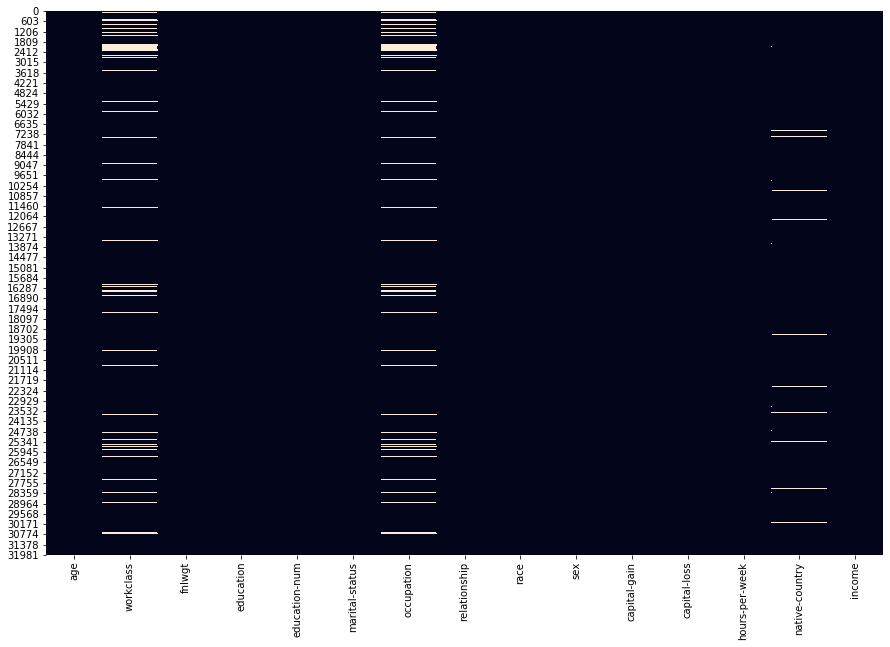

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(dataset.isnull(),cbar=False)
plt.show()

Consequentemente é necessário a remoção dos dados que possuem o valor _null_ da base dados.

In [19]:
dataset = dataset.dropna()

In [20]:
dataset.shape

(30139, 15)

In [21]:
dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

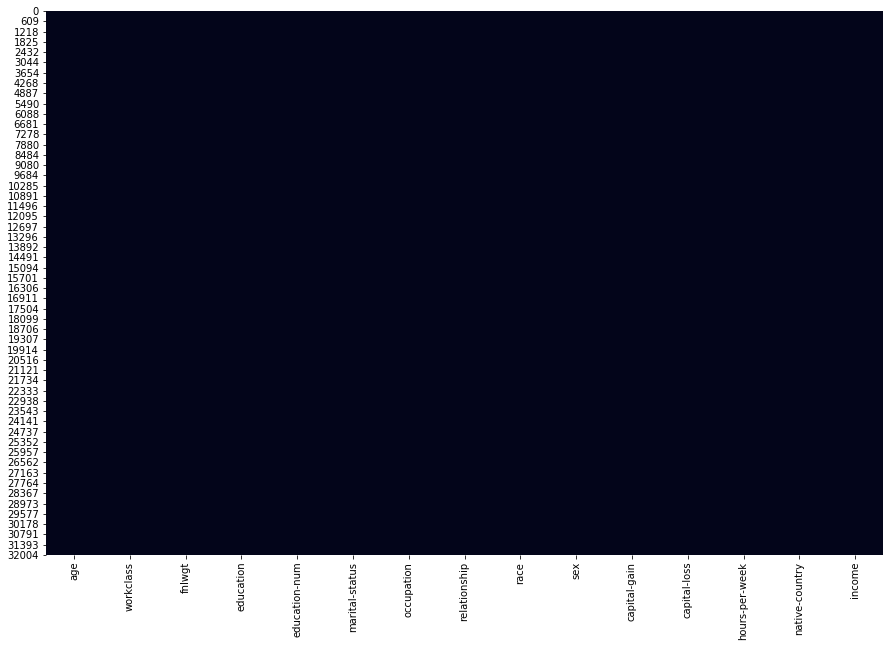

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(dataset.isnull(),cbar=False)
plt.show()

### <a id='43'>Adicionando novas colunas</a>   

#### <a id='431'>Categorizando a coluna age</a>   

Com o intuito de realizar uma análise mais detalhada e enriquecer ainda mais a base de dados com mais informações, será adicionado novas colunas com base na coluna _age_ .

Com base em três categorias referente ao faixa de idade que a pessoa possui será definido as seguintes faixas de idades:
- CHILDHOOD: Idade menor que 15.
- YOUNG: Idade maior que 15 e menor que 21.
- ADULT: Idade maior que 21 e menor que 60.
- OLD: Idade Maior que 60.


In [23]:
# lista de idades presentes nos dados
dataset['age'].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 34, 25, 43, 40,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 47, 46,
       36, 79, 27, 18, 33, 76, 55, 61, 70, 64, 71, 66, 51, 58, 26, 17, 60,
       90, 75, 65, 77, 62, 63, 67, 74, 72, 69, 68, 73, 81, 78, 88, 80, 84,
       83, 85, 82, 86])

In [24]:
def convert_period(num): 
    if num >= 15 and num < 21:
        return 'YOUNG'
    elif num >= 21 and num < 60:
        return 'ADULT'
    elif num >= 60:
        return 'OLD'
    else:
        return 'CHILDHOOD'
    
dataset['age_period'] = dataset.apply(lambda x: convert_period(x['age']),axis=1)
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_period
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,ADULT
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,ADULT
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,ADULT
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,ADULT
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,ADULT


#### <a id='432'>Categorizando a coluna education</a>   

Outra coluna que pode ser adicionada é referente ao nível de educação que a pessoa possui. Será utilizada como base a coluna _education-num_ para realizar os cálculos para a nova coluna.


In [25]:
dataset.groupby(["education", "education-num"]).size()

education     education-num
10th          6                 820
11th          7                1048
12th          8                 377
1st-4th       2                 149
5th-6th       3                 287
7th-8th       4                 556
9th           5                 455
Assoc-acdm    12               1008
Assoc-voc     11               1307
Bachelors     13               5042
Doctorate     16                375
HS-grad       9                9834
Masters       14               1626
Preschool     1                  44
Prof-school   15                542
Some-college  10               6669
dtype: int64

Como podemos observar a coluna "education-num" representa classificação categórica da coluna "education". Assim foi definido da seguinte forma os níveis de educação:
- Low: Idade menor que 8.
- Medium: Idade maior que 8 e menor que 13.
- High: Idade maior que 13.

In [26]:
def convert_level_education(num): 
    if num < 8:
        return 'Low'
    elif num >= 8 and num < 13:
        return 'Medium'
    elif num >= 13:
        return 'High'
    
dataset['education_level'] = dataset.apply(lambda x: convert_level_education(x['education-num']),axis=1)
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_period,education_level
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,ADULT,High
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,ADULT,High
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,ADULT,Medium
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,ADULT,Low
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,ADULT,High


#### <a id='433'>Categorizando a coluna income</a>   

In [27]:
income_map={'<=50K':1,'>50K':0}
dataset['income_cat']=dataset['income'].map(income_map).astype(int)
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_period,education_level,income_cat
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,ADULT,High,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,ADULT,High,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,ADULT,Medium,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,ADULT,Low,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,ADULT,High,1


#### <a id='434'>Adicionando a coluna de resultado do capital</a>   

In [28]:
dataset['capital-result'] = dataset['capital-gain'] - dataset['capital-loss']
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_period,education_level,income_cat,capital-result
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,ADULT,High,1,2174
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,ADULT,High,1,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,ADULT,Medium,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,ADULT,Low,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,ADULT,High,1,0


## <a id='5'>Amostragem</a>   

### <a id='51'>Amostragem simples - sem reposicao</a>   

A base de dados possui 30139 dados após a limpeza dos dados, desta forma, a amostra simples terá 20% do total.


In [29]:
dataset.shape

(30139, 19)

In [30]:
sample20Porcentage = dataset.sample(frac=0.2)
sample20Porcentage.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_period,education_level,income_cat,capital-result
10497,24,Private,49218,HS-grad,9,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K,ADULT,Medium,1,0
14673,52,Local-gov,346668,Masters,14,Never-married,Prof-specialty,Own-child,White,Female,0,0,40,United-States,<=50K,ADULT,High,1,0
18668,23,Private,148709,HS-grad,9,Married-civ-spouse,Adm-clerical,Other-relative,White,Female,0,0,35,United-States,<=50K,ADULT,Medium,1,0
5424,32,Private,153078,Bachelors,13,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,40,South,<=50K,ADULT,High,1,0
5982,19,Private,141868,HS-grad,9,Never-married,Transport-moving,Own-child,White,Male,0,0,40,United-States,<=50K,YOUNG,Medium,1,0


In [31]:
sample20Porcentage.shape

(6028, 19)

Confirmando o total de 20% de 30139.

In [32]:
display('Sumário estatístico da população', sample20Porcentage.describe())

'Sumário estatístico da população'

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income_cat,capital-result
count,6028.000000,6.028000e+03,6028.000000,6028.000000,6028.000000,6028.000000,6028.000000,6028.000000
mean,38.509622,1.888506e+05,10.108162,1180.090411,90.374585,40.961181,0.748009,1089.715826
std,13.082326,1.040796e+05,2.543254,7981.351314,414.440573,12.135189,0.434192,8005.439747
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,2.000000,0.000000,-3900.000000
25%,28.000000,1.187740e+05,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000
50%,37.000000,1.788165e+05,10.000000,0.000000,0.000000,40.000000,1.000000,0.000000
75%,47.000000,2.336292e+05,13.000000,0.000000,0.000000,45.000000,1.000000,0.000000
max,90.000000,1.226583e+06,16.000000,99999.000000,3900.000000,99.000000,1.000000,99999.000000


### <a id='52'>Amostragem simples - com reposicao</a>   

In [33]:
dataset.sample(frac=0.1, replace=True, random_state=1).head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_period,education_level,income_cat,capital-result
32123,44,Federal-gov,281739,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Male,13550,0,50,United-States,>50K,ADULT,Medium,0,13550
255,42,Self-emp-not-inc,303044,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,Asian-Pac-Islander,Male,0,0,40,Cambodia,>50K,ADULT,Medium,0,0
13160,30,Private,189759,Bachelors,13,Never-married,Transport-moving,Not-in-family,White,Male,4865,0,40,United-States,<=50K,ADULT,High,1,4865
5664,33,Private,192644,HS-grad,9,Separated,Handlers-cleaners,Unmarried,White,Male,0,0,35,Puerto-Rico,<=50K,ADULT,Medium,1,0
18663,27,Private,120155,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,39,United-States,<=50K,ADULT,Medium,1,0


In [34]:
display('Sumário estatístico da amostra simples', dataset.sample(frac=0.1, replace=True, random_state=1).describe())

'Sumário estatístico da amostra simples'

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income_cat,capital-result
count,3014.000000,3.014000e+03,3014.000000,3014.000000,3014.000000,3014.000000,3014.000000,3014.000000
mean,38.386530,1.926676e+05,10.152953,1030.268082,88.900796,41.270073,0.748507,941.367286
std,12.707967,1.065899e+05,2.513455,6976.957017,410.160642,12.116787,0.433943,7002.100047
min,17.000000,1.930200e+04,1.000000,0.000000,0.000000,1.000000,0.000000,-4356.000000
25%,28.000000,1.211525e+05,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000
50%,37.000000,1.822880e+05,10.000000,0.000000,0.000000,40.000000,1.000000,0.000000
75%,47.000000,2.381910e+05,13.000000,0.000000,0.000000,45.000000,1.000000,0.000000
max,85.000000,1.184622e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000,99999.000000


### <a id='53'>Amostragem Sistemática</a>   

Amostra aleatória possui uma sequência, será utilizado uma sequência de 5 index.

In [35]:
sampleSistematica = dataset[::5]
sampleSistematica.head(4)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_period,education_level,income_cat,capital-result
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,ADULT,High,1,2174
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,ADULT,High,1,0
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K,ADULT,Medium,0,0
16,25,Self-emp-not-inc,176756,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,35,United-States,<=50K,ADULT,Medium,1,0


In [36]:
display('Sumário estatístico da amostra sistemática', sampleSistematica.describe())

'Sumário estatístico da amostra sistemática'

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income_cat,capital-result
count,6028.000000,6.028000e+03,6028.000000,6028.000000,6028.000000,6028.000000,6028.000000,6028.000000
mean,38.325647,1.905169e+05,10.094891,1093.557896,86.868779,40.905109,0.756636,1006.689117
std,13.074849,1.067083e+05,2.554198,7259.092854,399.974049,12.017890,0.429149,7283.160846
min,17.000000,1.975200e+04,1.000000,0.000000,0.000000,1.000000,0.000000,-3683.000000
25%,28.000000,1.170692e+05,9.000000,0.000000,0.000000,40.000000,1.000000,0.000000
50%,37.000000,1.784635e+05,10.000000,0.000000,0.000000,40.000000,1.000000,0.000000
75%,47.000000,2.389478e+05,12.000000,0.000000,0.000000,45.000000,1.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,3683.000000,99.000000,1.000000,99999.000000


### <a id='54'>Amostragem estratificada</a>   

Uma forma de estratificar uma população no python é utilizar a biblioteca sklearn

In [37]:
from sklearn.model_selection import train_test_split
X, y = dataset, range(30139)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_period,education_level,income_cat,capital-result
16388,35,Private,217893,HS-grad,9,Divorced,Sales,Not-in-family,White,Female,0,0,30,United-States,<=50K,ADULT,Medium,1,0
14683,50,Federal-gov,96657,Bachelors,13,Divorced,Prof-specialty,Unmarried,Black,Female,0,0,40,United-States,<=50K,ADULT,High,1,0
5550,29,Private,132874,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K,ADULT,Medium,1,0
19929,23,Private,99543,12th,8,Never-married,Transport-moving,Not-in-family,White,Male,0,0,46,United-States,<=50K,ADULT,Medium,1,0
8462,63,Private,264968,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,40,United-States,<=50K,OLD,High,1,0


## <a id='6'>Explorando e visualizando os dados</a>   

### <a id='61'>Análise univariada</a>   

A seguir será gerado gráficos de histogramas relacionados as variáveis do conjunto.

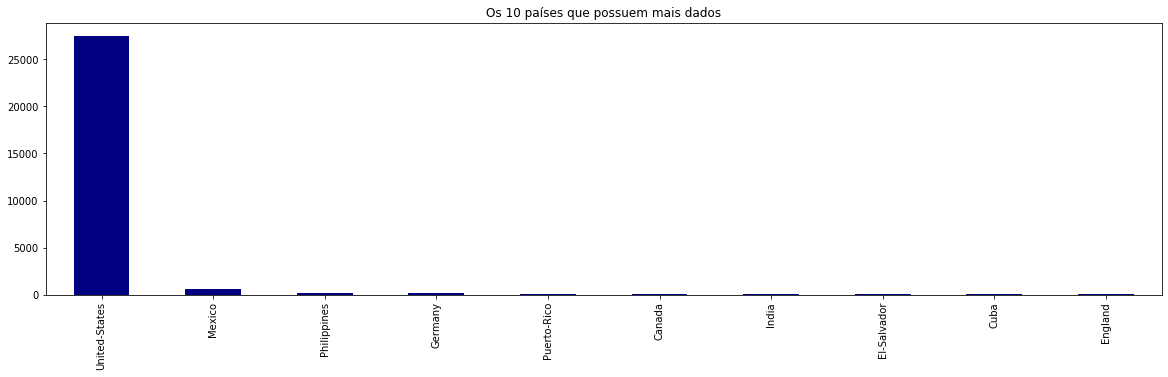

In [38]:
countries = dataset['native-country'].value_counts(ascending=False)
countries[:10].plot.bar(title='Os 10 países que possuem mais dados',colormap='jet', figsize=(20,5))

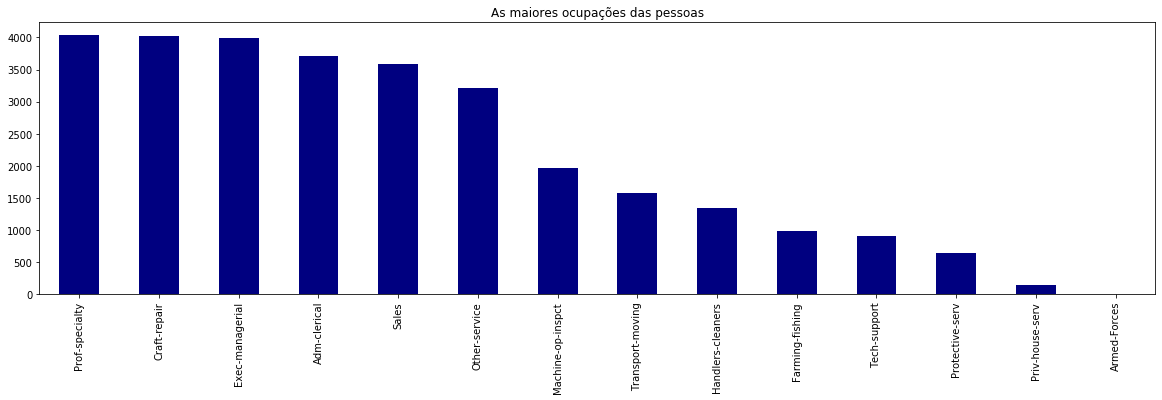

In [39]:
dataset['occupation'].value_counts().plot.bar(title='As maiores ocupações das pessoas', colormap='jet', figsize=(20,5))

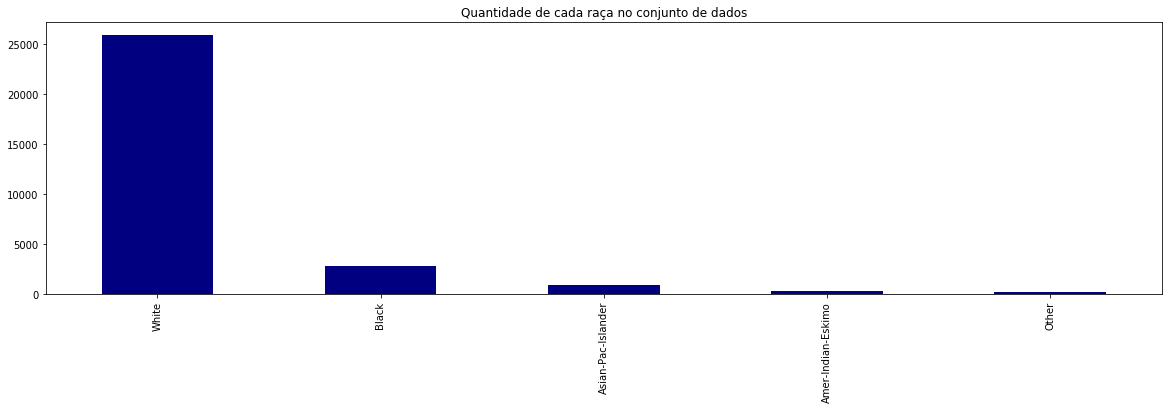

In [40]:
dataset['race'].value_counts().plot.bar(title='Quantidade de cada raça no conjunto de dados', colormap='jet', figsize=(20,5))

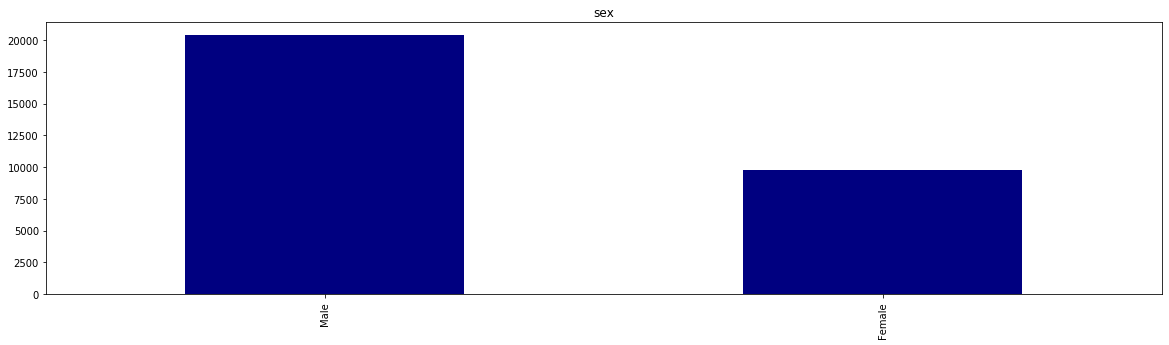

In [41]:
dataset['sex'].value_counts().plot.bar(title='sex', colormap='jet', figsize=(20,5))

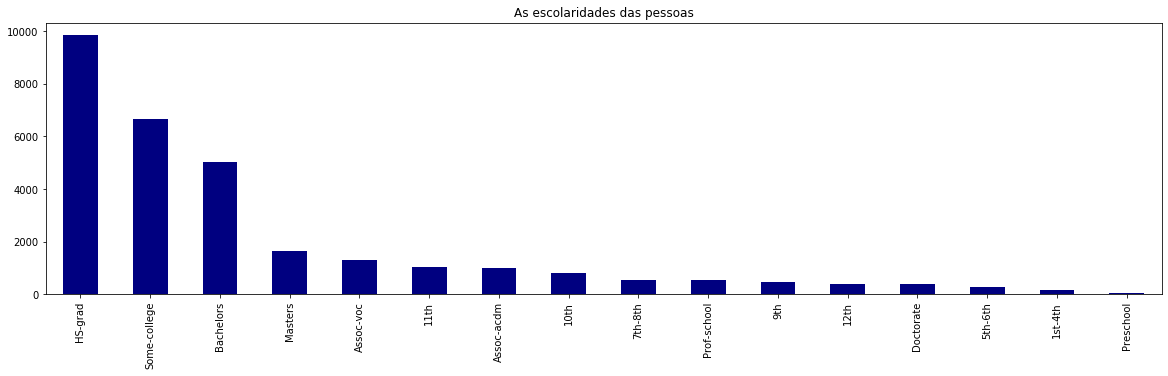

In [42]:
dataset['education'].value_counts().plot.bar(title='As escolaridades das pessoas', colormap='jet', figsize=(20,5))

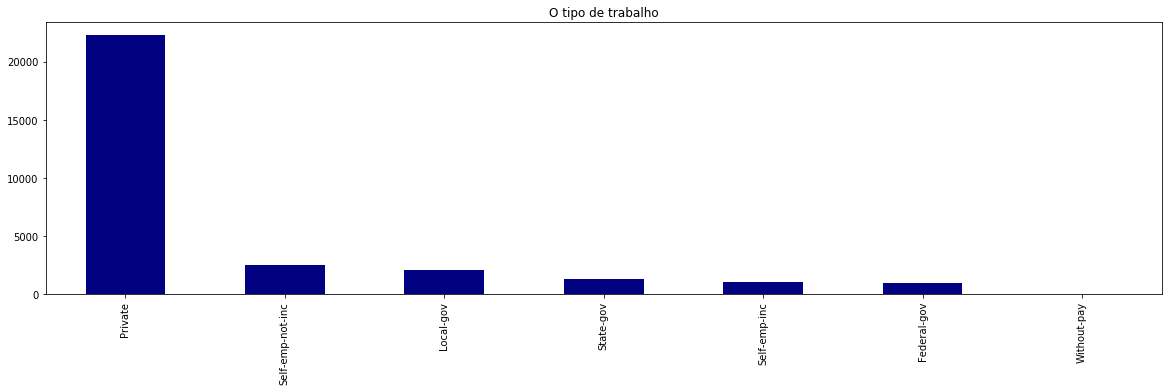

In [43]:
dataset['workclass'].value_counts().plot.bar(title='O tipo de trabalho', colormap='jet', figsize=(20,5))

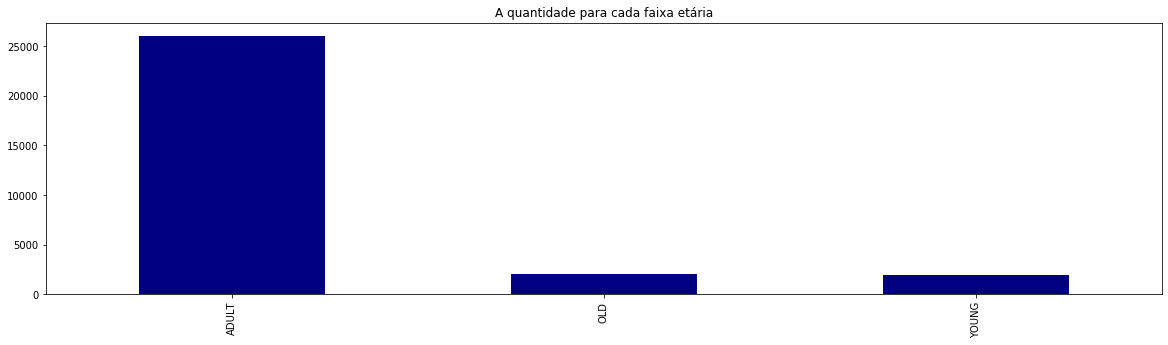

In [44]:
dataset['age_period'].value_counts().plot.bar(title='A quantidade para cada faixa etária', colormap='jet', figsize=(20,5))

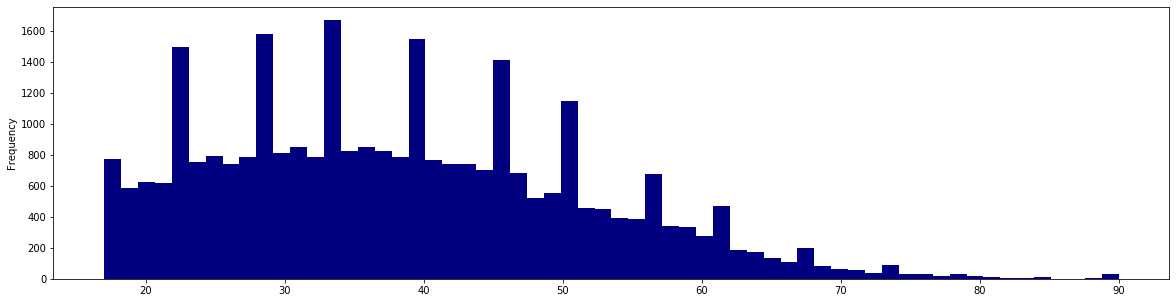

In [45]:
dataset['age'].plot(kind = 'hist',bins = 60, colormap='jet', figsize=(20,5))

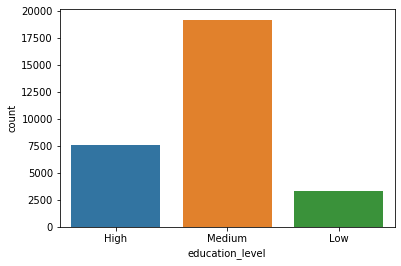

In [46]:
sns.countplot(dataset['education_level'])

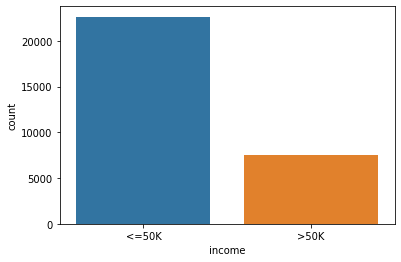

In [47]:
sns.countplot(dataset.income)

Com base nos gráficos gerados da análise univariada já podemos obter algumas informações relevantes sobre a base de dados que as seguintes: 
- A maioria das pessoas da base são do gênero masculino.
- A maior parte dos dados é dos Estados Unidos.
- E as pessoas brancas é predominante na base dados.
- A grande maioria das pessoas possui nível de educação médio.
- A maioria trabalha para o setor privado.
- E recebem menos de 50K.

### <a id='62'>Análise bivariada</a>   

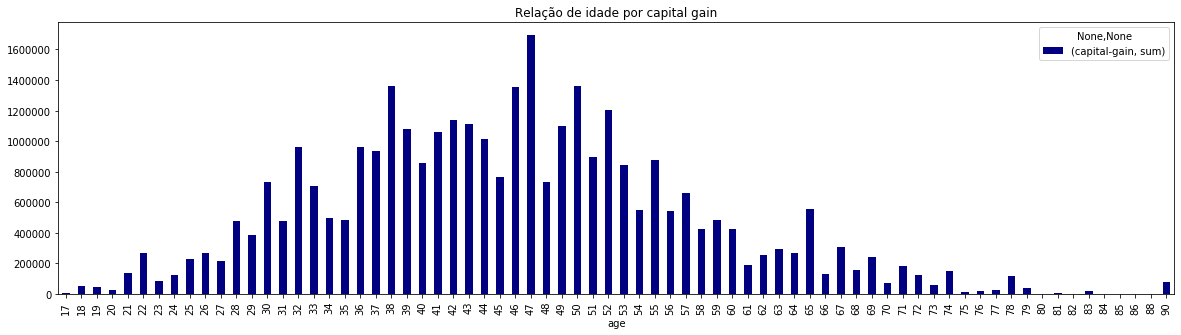

In [48]:
dataset.groupby(['age']).agg({'capital-gain': [np.sum]}).plot.bar(title='Relação de idade por capital gain',colormap='jet', figsize=(20,5))

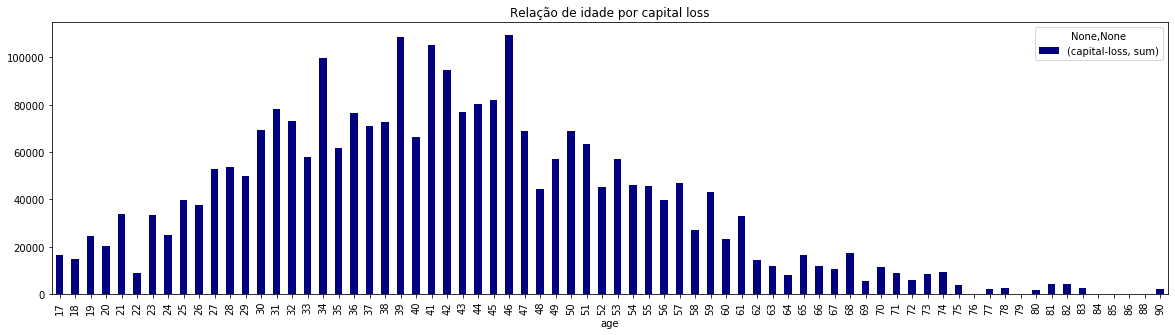

In [49]:
dataset.groupby(['age']).agg({'capital-loss': [np.sum]}).plot.bar(title='Relação de idade por capital loss',colormap='jet', figsize=(20,5))

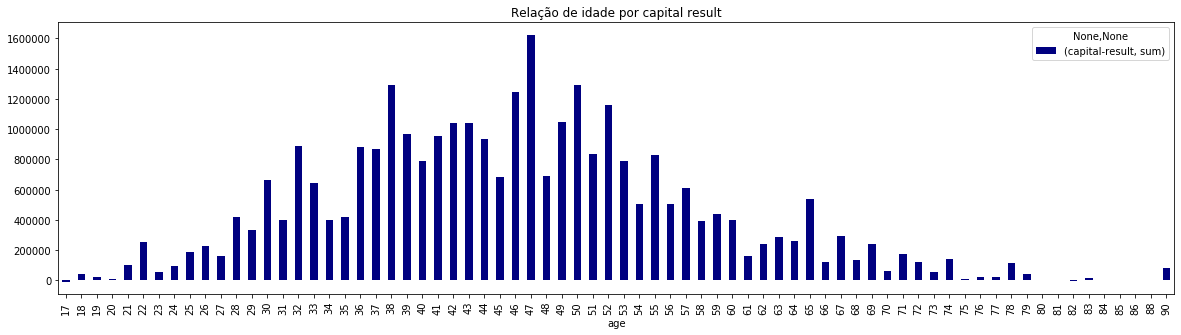

In [50]:
dataset.groupby(['age']).agg({'capital-result': [np.sum]}).plot.bar(title='Relação de idade por capital result',colormap='jet', figsize=(20,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1a8b3690>,
      dtype=object)

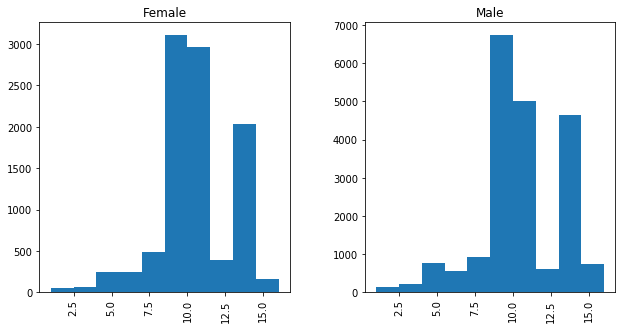

In [51]:
dataset['education-num'].hist(by=dataset['sex'], figsize=(10,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1a7f1890>,
      dtype=object)

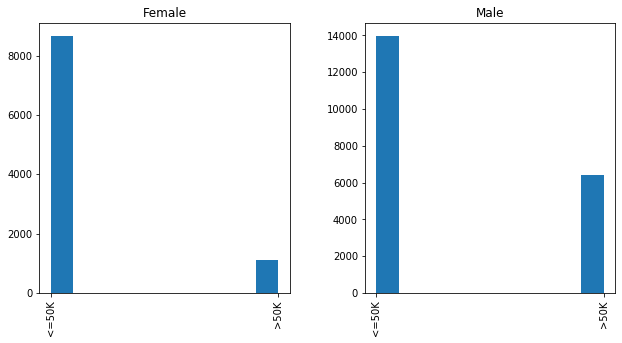

In [52]:
dataset['income'].hist(by=dataset['sex'], figsize=(10,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1a430b50>,
      dtype=object)

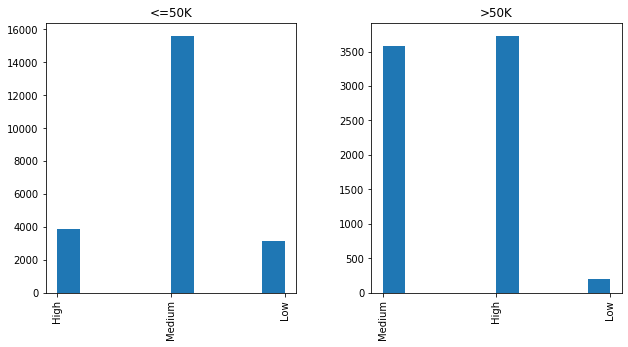

In [53]:
dataset['education_level'].hist(by=dataset['income'], figsize=(10,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b07dd50>,
      dtype=object)

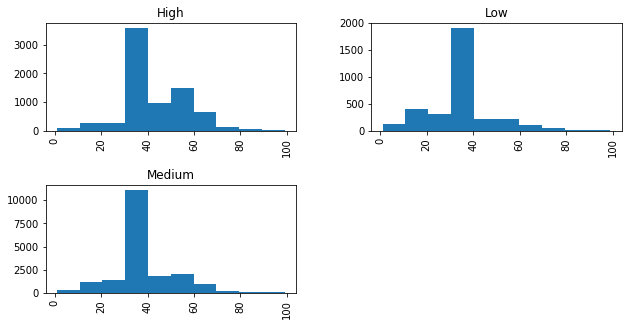

In [54]:
dataset['hours-per-week'].hist(by=dataset['education_level'], figsize=(10,5))

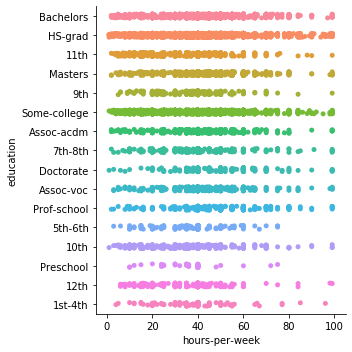

In [55]:
sns.catplot(x="hours-per-week", y="education", data=dataset);

In [56]:
dataset[['education-num','hours-per-week']].groupby(['education-num']).mean()

,hours-per-week
education-num,
1,36.568182
2,38.355705
3,38.742160
4,40.131295
5,38.767033
6,37.464634
7,34.193702
8,35.697613
9,41.041895


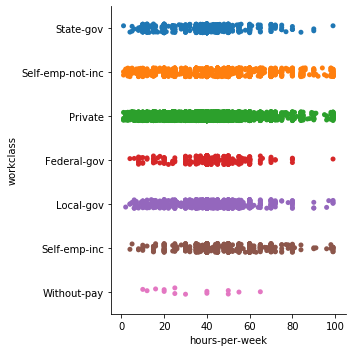

In [57]:
sns.catplot(x="hours-per-week", y="workclass", data=dataset);

In [58]:
dataset[['workclass','hours-per-week']].groupby(['workclass']).mean()

,hours-per-week
workclass,
Federal-gov,41.279958
Local-gov,41.002419
Private,40.254851
Self-emp-inc,48.802607
Self-emp-not-inc,44.433947
State-gov,39.053948
Without-pay,32.714286


In [59]:
dataset[['relationship','income_cat']].groupby(['relationship']).mean()

,income_cat
relationship,
Husband,0.544272
Not-in-family,0.893311
Other-relative,0.960630
Own-child,0.985657
Unmarried,0.933666
Wife,0.506401


Com base nos gráficos gerados da análise bivariada contem algumas informações relevantes sobre a base, tais como:
- Quanto maior o grau de educação maior é a taxa de horas trabalhadas por semana. Por exemplo, a média de horas trabalhadas que tinham apenas a escolaridade 9th possuem a média de 38.767033 enquanto para Doctorate é de 47.832000.
- E Self-employment tem uma média maior de trabalho comparado com os outros tipos.
- Na base de dados os homens possuem maior nível de educação

### <a id='63'>Análise Multivariada</a>   

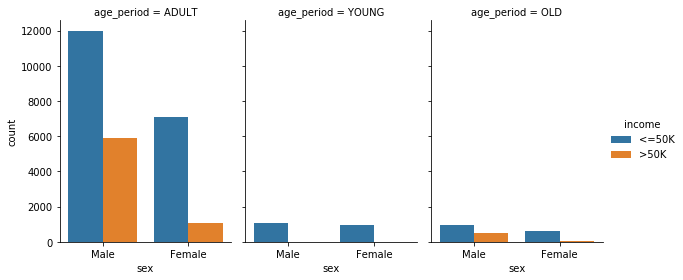

In [60]:
sns.catplot(x="sex", hue="income", col="age_period",
                 data=dataset, kind="count",
                 height=4, aspect=.7);

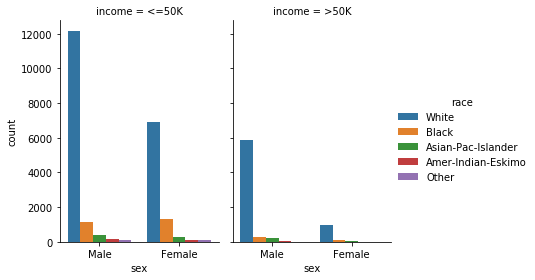

In [61]:
sns.catplot(x="sex", hue="race", col="income",
                 data=dataset, kind="count",
                 height=4, aspect=.7);

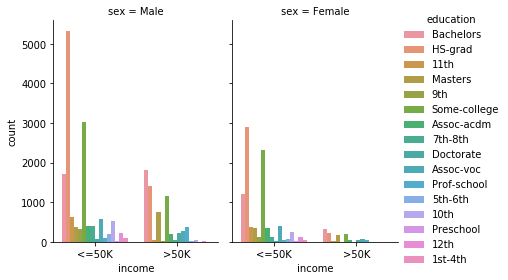

In [62]:
sns.catplot(x="income", hue="education", col="sex",
                 data=dataset, kind="count",
                 height=4, aspect=.7);

## <a id='7'>Analisando os conjuntos de dados</a>   

Nesta seção serão realizadas análises utilizando diferentes amostras da população de dados onde será possível obter uma detalhamento do conjunto de dados. Serão utilizados as seguintes amostras:
- População 
- Amostra simples (20%)

Serão verificados os seguintes dados:

    a) A média de idade geral, das mulheres e dos homens.
    b) média e o desvio padrão da idade dos que recebem mais de 50 mil por ano menos de 50 mil por ano e para homens e mulheres.
    c) média e o desvio padrão da idade por país
    d) média e o desvio padrão das horas trabalhadas por educação para os recebem mais de 50 mil por ano menos de 50 mil por ano.

### a) - Utilizando a população

In [63]:
print('Idade geral da base de dados: ', dataset['age'].mean())
print('Idade das mulheres: ', dataset.loc[dataset['sex'] == 'Female', 'age'].mean())
print('Idade dos homens: ', dataset.loc[dataset['sex'] == 'Male', 'age'].mean())

Idade geral da base de dados:  38.44172003052523
Idade das mulheres:  36.89061700603704
Idade dos homens:  39.18604536973387


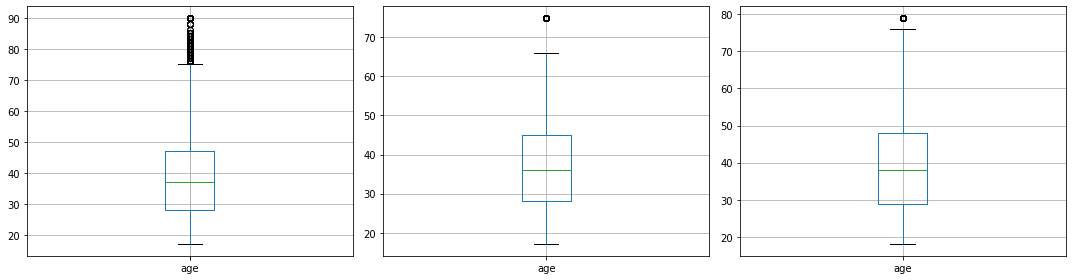

In [64]:
fig, axes = plt.subplots(1,3, figsize=(15,4)) # create figure and axes

a = dataset.boxplot(column =['age'], ax=axes.flatten()[0]) 
a = dataset.boxplot(column =['age'], ax=axes.flatten()[0]) 
dataset[dataset['sex'].isin(['Female'])].iloc[dataset['age']].boxplot(column =['age'], ax=axes.flatten()[1]) 
dataset[dataset['sex'].isin(['Male'])].iloc[dataset['age']].boxplot(column =['age'], ax=axes.flatten()[2]) 

plt.tight_layout() 
plt.show()

a) - Utilizando a amostra simples

In [65]:
sample20Per = pd.DataFrame(data=sample20Porcentage)

print('Idade geral da base de dados: ', sample20Per['age'].mean())
print('Idade das mulheres: ', sample20Per.loc[sample20Per['sex'] == 'Female', 'age'].mean())
print('Idade dos homens: ', sample20Per.loc[sample20Per['sex'] == 'Male', 'age'].mean())

Idade geral da base de dados:  38.50962176509622
Idade das mulheres:  37.288411116937596
Idade dos homens:  39.074739140985194


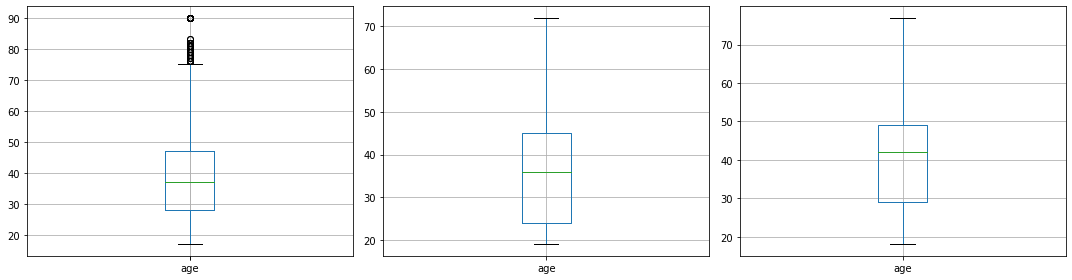

In [66]:
fig, axes = plt.subplots(1,3, figsize=(15,4)) # create figure and axes

a = sample20Per.boxplot(column =['age'], ax=axes.flatten()[0]) 
a = sample20Per.boxplot(column =['age'], ax=axes.flatten()[0]) 
sample20Per[sample20Per['sex'].isin(['Female'])].iloc[sample20Per['age']].boxplot(column =['age'], ax=axes.flatten()[1]) 
sample20Per[sample20Per['sex'].isin(['Male'])].iloc[sample20Per['age']].boxplot(column =['age'], ax=axes.flatten()[2]) 

plt.tight_layout() 
plt.show()

### b) Utilizando a população

In [67]:
print('Média de idade para as quem recebe menos de <=50K: ', round(dataset.loc[dataset['income'] == '<=50K', 'age'].mean(), 2))
print('Média de idade para as quem recebe menos de >50K: ', round(dataset.loc[dataset['income'] == '>50K', 'age'].mean(), 2))
print('')
WhiteDatacapitalGain = dataset[(dataset['native-country'] == 'United-States') & (dataset['race'] == 'White')]['capital-gain']

print('Male: Média de idade para as quem recebe menos de <=50K: ', 
      round(dataset[(dataset['income'] == '<=50K') & (dataset['sex'] == 'Male')]['age'].mean(), 2))
print('Male: Média de idade para as quem recebe menos de >50K: ', 
      round(dataset[(dataset['income'] == '>50K') & (dataset['sex'] == 'Male')]['age'].mean(), 2))
print('')

print('Female: Média de idade para as quem recebe menos de <=50K: ', 
      round(dataset[(dataset['income'] == '<=50K') & (dataset['sex'] == 'Female')]['age'].mean(), 2))
print('Female: Média de idade para as quem recebe menos de >50K: ', 
      round(dataset[(dataset['income'] == '>50K') & (dataset['sex'] == 'Female')]['age'].mean(), 2))

Média de idade para as quem recebe menos de <=50K:  36.61
Média de idade para as quem recebe menos de >50K:  43.96

Male: Média de idade para as quem recebe menos de <=50K:  36.84
Male: Média de idade para as quem recebe menos de >50K:  44.31

Female: Média de idade para as quem recebe menos de <=50K:  36.24
Female: Média de idade para as quem recebe menos de >50K:  41.96


b) Utilizando amostra simples

In [68]:
print('Média de idade para as quem recebe menos de <=50K: ', round(sample20Per.loc[sample20Per['income'] == '<=50K', 'age'].mean(), 2))
print('Média de idade para as quem recebe menos de >50K: ', round(sample20Per.loc[sample20Per['income'] == '>50K', 'age'].mean(), 2))
print('')
WhiteDatacapitalGain = sample20Per[(sample20Per['native-country'] == 'United-States') & (sample20Per['race'] == 'White')]['capital-gain']

print('Male: Média de idade para as quem recebe menos de <=50K: ', 
      round(sample20Per[(sample20Per['income'] == '<=50K') & (sample20Per['sex'] == 'Male')]['age'].mean(), 2))
print('Male: Média de idade para as quem recebe menos de >50K: ', 
      round(sample20Per[(sample20Per['income'] == '>50K') & (sample20Per['sex'] == 'Male')]['age'].mean(), 2))
print('')

print('Female: Média de idade para as quem recebe menos de <=50K: ', 
      round(sample20Per[(sample20Per['income'] == '<=50K') & (sample20Per['sex'] == 'Female')]['age'].mean(), 2))
print('Female: Média de idade para as quem recebe menos de >50K: ', 
      round(sample20Per[(sample20Per['income'] == '>50K') & (sample20Per['sex'] == 'Female')]['age'].mean(), 2))

Média de idade para as quem recebe menos de <=50K:  36.71
Média de idade para as quem recebe menos de >50K:  43.84

Male: Média de idade para as quem recebe menos de <=50K:  36.76
Male: Média de idade para as quem recebe menos de >50K:  44.05

Female: Média de idade para as quem recebe menos de <=50K:  36.64
Female: Média de idade para as quem recebe menos de >50K:  42.56


### c) Utilizando a população

In [69]:
categorical_attributes = ['United-States', 'Mexico', 'Philippines', 'Germany', 'Puerto-Rico']
for i, attribute in enumerate(categorical_attributes):
    print(attribute, '- Mean: ', dataset[(dataset['native-country'] == attribute)]['age'].mean(), '| std: ', dataset[(dataset['native-country'] == attribute)]['age'].std())

United-States - Mean:  38.50605740895696 | std:  13.180951912579847
Mexico - Mean:  33.21452145214521 | std:  10.650892346988696
Philippines - Mean:  39.755319148936174 | std:  12.82601481549635
Germany - Mean:  39.6953125 | std:  12.415102939723738
Puerto-Rico - Mean:  40.14678899082569 | std:  12.886847794376763


c) Utilizando a amostra simples

In [70]:
categorical_attributes = ['United-States', 'Mexico', 'Philippines', 'Germany', 'Puerto-Rico']
for i, attribute in enumerate(categorical_attributes):
    print(attribute, '- Mean: ', sample20Per[(sample20Per['native-country'] == attribute)]['age'].mean(), '| std: ', sample20Per[(sample20Per['native-country'] == attribute)]['age'].std())

United-States - Mean:  38.561509021323126 | std:  13.088532985683905
Mexico - Mean:  33.2991452991453 | std:  10.964885141201464
Philippines - Mean:  43.14705882352941 | std:  15.560502354088266
Germany - Mean:  37.14705882352941 | std:  10.910468570170456
Puerto-Rico - Mean:  39.2 | std:  15.858751527153705


### d) Utilizando a população

In [71]:
categorical_attributes = ['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college', 'Assoc-acdm', '7th-8th', 'Doctorate', 'Assoc-voc', 'Prof-school', '5th-6th', '10th', 'Preschool', '12th', '1st-4th']
for i, attribute in enumerate(categorical_attributes):
    
    print(attribute, '- Mean <=50K: ', round(dataset.loc[dataset['income'] == '<=50K', 'hours-per-week'].mean(),2),
         '|| Mean >50K: ', round(dataset.loc[dataset['income'] == '>50K', 'hours-per-week'].mean(), 2))

Bachelors - Mean <=50K:  39.35 || Mean >50K:  45.71
HS-grad - Mean <=50K:  39.35 || Mean >50K:  45.71
11th - Mean <=50K:  39.35 || Mean >50K:  45.71
Masters - Mean <=50K:  39.35 || Mean >50K:  45.71
9th - Mean <=50K:  39.35 || Mean >50K:  45.71
Some-college - Mean <=50K:  39.35 || Mean >50K:  45.71
Assoc-acdm - Mean <=50K:  39.35 || Mean >50K:  45.71
7th-8th - Mean <=50K:  39.35 || Mean >50K:  45.71
Doctorate - Mean <=50K:  39.35 || Mean >50K:  45.71
Assoc-voc - Mean <=50K:  39.35 || Mean >50K:  45.71
Prof-school - Mean <=50K:  39.35 || Mean >50K:  45.71
5th-6th - Mean <=50K:  39.35 || Mean >50K:  45.71
10th - Mean <=50K:  39.35 || Mean >50K:  45.71
Preschool - Mean <=50K:  39.35 || Mean >50K:  45.71
12th - Mean <=50K:  39.35 || Mean >50K:  45.71
1st-4th - Mean <=50K:  39.35 || Mean >50K:  45.71


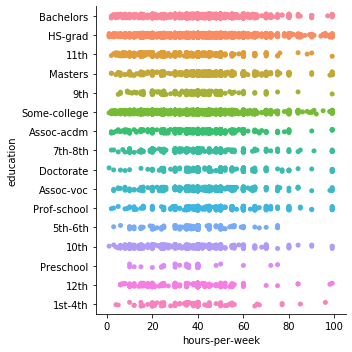

In [72]:
sns.catplot(x="hours-per-week", y="education", data=dataset);

d) Utilizando a amostra simples

In [73]:
categorical_attributes = ['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college', 'Assoc-acdm', '7th-8th', 'Doctorate', 'Assoc-voc', 'Prof-school', '5th-6th', '10th', 'Preschool', '12th', '1st-4th']
for i, attribute in enumerate(categorical_attributes):
    
    print(attribute, '- Mean <=50K: ', round(sample20Per.loc[sample20Per['income'] == '<=50K', 'hours-per-week'].mean(),2),
         '|| Mean >50K: ', round(sample20Per.loc[sample20Per['income'] == '>50K', 'hours-per-week'].mean(), 2))

Bachelors - Mean <=50K:  39.16 || Mean >50K:  46.3
HS-grad - Mean <=50K:  39.16 || Mean >50K:  46.3
11th - Mean <=50K:  39.16 || Mean >50K:  46.3
Masters - Mean <=50K:  39.16 || Mean >50K:  46.3
9th - Mean <=50K:  39.16 || Mean >50K:  46.3
Some-college - Mean <=50K:  39.16 || Mean >50K:  46.3
Assoc-acdm - Mean <=50K:  39.16 || Mean >50K:  46.3
7th-8th - Mean <=50K:  39.16 || Mean >50K:  46.3
Doctorate - Mean <=50K:  39.16 || Mean >50K:  46.3
Assoc-voc - Mean <=50K:  39.16 || Mean >50K:  46.3
Prof-school - Mean <=50K:  39.16 || Mean >50K:  46.3
5th-6th - Mean <=50K:  39.16 || Mean >50K:  46.3
10th - Mean <=50K:  39.16 || Mean >50K:  46.3
Preschool - Mean <=50K:  39.16 || Mean >50K:  46.3
12th - Mean <=50K:  39.16 || Mean >50K:  46.3
1st-4th - Mean <=50K:  39.16 || Mean >50K:  46.3
